<a href="https://colab.research.google.com/github/Harishchand83077/LSTM-stock-price-prediction/blob/main/DJIA_stock_NLP_Forecast_using_NEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **DOW JONES INDUSTRIAL STOCK ANALYSIS AND STOCK MARKET PREDICTION USING NLP ON NEWS**

There are two channels of data provided in this dataset:

News data: I crawled historical news headlines from Reddit WorldNews Channel (/r/worldnews). They are ranked by reddit users' votes, and only the top 25 headlines are considered for a single date.
(Range: 2008-06-08 to 2016-07-01)

Stock data: Dow Jones Industrial Average (DJIA) is used to "prove the concept".
(Range: 2008-08-08 to 2016-07-01)

I provided three data files in .csv format:

RedditNews.csv: two columns
The first column is the "date", and second column is the "news headlines".
All news are ranked from top to bottom based on how hot they are.
Hence, there are 25 lines for each date.

DJIA_table.csv:
Downloaded directly from Yahoo Finance: check out the web page for more info.

Combined_News_DJIA.csv:
To make things easier for my students, I provide this combined dataset with 27 columns.
The first column is "Date", the second is "Label", and the following ones are news headlines ranging from "Top1" to "Top25".

This notebook explores the relationship between news sentiment and the Dow Jones Industrial Average (DJIA) stock prices using Natural Language Processing (NLP) techniques. By analyzing historical news data, we aim to uncover patterns and predict future stock price movements and it also covers the DJIA stocks performance on volume purchase basis.

<img src="https://www.investopedia.com/thmb/aRE31Fe4cj5ZVs5niJH7YclL6uU=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/DowJonesIndustrialAverage-af0c386c72c74e05b1ccc563b4a0ea06.jpg" width="400px" height="400px">

# LIBRARIES:



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


# LOAD DATASET:

In [3]:
path="/content/Combined_News_DJIA.csv"
df=pd.read_csv(path)

In [4]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [5]:
df.tail()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1984,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,German lawyers to probe Erdogan over alleged w...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...
1985,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,CEO of the South African state broadcaster qui...,"Brexit cost investors $2 trillion, the worst o...",Hong Kong democracy activists call for return ...,Brexit: Iceland president says UK can join 'tr...,...,"US, Canada and Mexico pledge 50% of power from...",There is increasing evidence that Australia is...,"Richard Branson, the founder of Virgin Group, ...","37,000-yr-old skull from Borneo reveals surpri...",Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...
1986,2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was Just Firebombed Wh...,Mexican Authorities Sexually Torture Women in ...,UK shares and pound continue to recover,...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...
1987,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
1988,2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates 

In [6]:
show=df[df['Date'] == '2012-11-06' ]

In [7]:
show

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1069,2012-11-06,1,Harassers of women in Cairo now face wrath of ...,Skype illegally distributed a user's personal ...,"The world's rarest whale, known until \nnow ju...",Israel has announced plans to press ahead with...,Malawi suspends laws against homosexual relati...,Scots Farmers to Reap Solar Power Harvest - Ne...,Murdered Briton Neil Heywood was MI6 informant...,Russian attack sub detected near U.S. East Coast,...,"Ed Miliband has unveiled plans to deliver a ""l...",Boeing to clinch $2.4 billion Indian Air Force...,UK and Germany agree tax crackdown on multinat...,"Global Domination? Whoa, Canada!: ""[T]here is ...",Canada's legal hemp industry growing,Greek workers stage mass anti-austerity walkout,A Dying Model: Chinese Capitalism-- Chinas eco...,Egyptian Vigilantes Crack Down on Abuse of Wom...,Report says Syrian generals defect to Turkey,Russian President Vladimir Putin dismissed Def...


In [8]:
df.shape

(1989, 27)

In [9]:
df.describe()

,Label
count,1989.000000
mean,0.535445
std,0.498867
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


DATA CLEANING

> # Check the indiviual record which is null

In [10]:
null_records = df[df['Top23'].isnull()]

In [11]:
most_frequent = df['Top23'].mode()[0]
df['Top23'].fillna(most_frequent, inplace=True)

<ipython-input-11-0837209004c4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Top23'].fillna(most_frequent, inplace=True)


> #  USE MODE IMPUTATION TECHNIQUES TO HANDLE NULL VALUES WITH MOST FREQUENT(MODE):

In [12]:
most_frequent = df['Top23'].mode()[0]
df['Top24'].fillna(most_frequent, inplace=True)

<ipython-input-12-3a6db3920810>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Top24'].fillna(most_frequent, inplace=True)


In [13]:
most_frequent = df['Top23'].mode()[0]
df['Top25'].fillna(most_frequent, inplace=True)

<ipython-input-13-7ac79f749e19>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Top25'].fillna(most_frequent, inplace=True)


In [14]:
df.isnull().sum()

,0
Date,0
Label,0
Top1,0
Top2,0
Top3,0
Top4,0
Top5,0
Top6,0
Top7,0
Top8,0


In [15]:
df.duplicated().sum()

0

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year


df_grouped = df.groupby('year').agg({'Label': 'mean'}).reset_index()

> #  GROUPED STOCK IMPACT (INCEARSE [1] OR DECREASE [0]) YEAR WISE

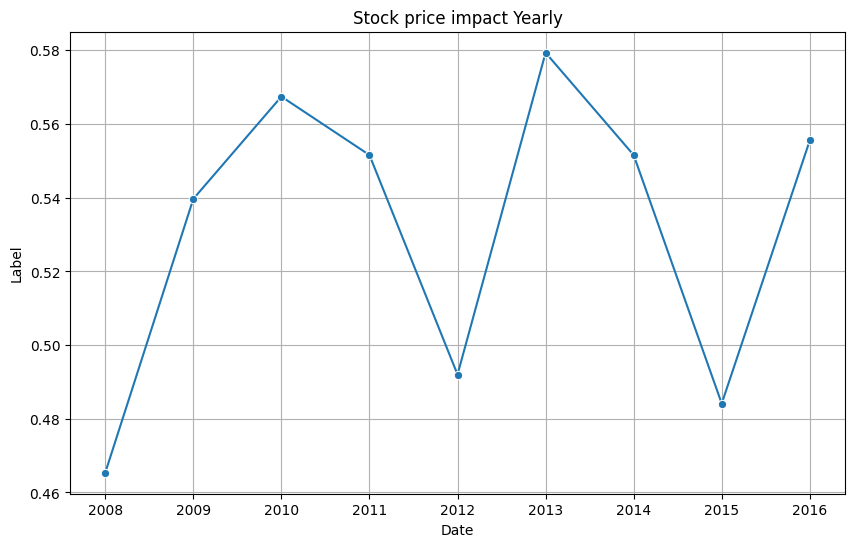

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Label', data=df_grouped, marker='o')

# Adding titles and labels
plt.title('Stock price impact Yearly')
plt.xlabel('Date')
plt.ylabel('Label')

# Display the graph
plt.grid(True)
plt.show()

> # **NLP ON NEWS AND STOCK PRICE PREDICTION ON THE BASIS OF NEWS**

In [18]:
#Display the full content news of each column
pd.set_option('display.max_colwidth', None)


In [19]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,year
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as countries move to brink of war""",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)',"b'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire'","b""Afghan children raped with 'impunity,' U.N. official says - this is sick, a three year old was raped and they do nothing""",b'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.',"b""Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO's side""","b""The 'enemy combatent' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it.""",...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to prevent an Israeli strike on Iran."" Israeli Defense Minister Ehud Barak: ""Israel is prepared for uncompromising victory in the case of military hostilities.""'",b'This is a busy day: The European Union has approved new sanctions against Iran in protest at its nuclear programme.',"b""Georgia will withdraw 1,000 soldiers from Iraq to help fight off Russian forces in Georgia's breakaway region of South Ossetia""",b'Why the Pentagon Thinks Attacking Iran is a Bad Idea - US News &amp; World Report',b'Caucasus in crisis: Georgia invades South Ossetia',"b'Indian shoe manufactory - And again in a series of ""you do not like your work?""'",b'Visitors Suffering from Mental Illnesses Banned from Olympics',"b""No Help for Mexico's Kidnapping Surge""",2008
1,2008-08-11,1,"b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'",b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli training, we're fending off Russia """,b'Georgian army flees in disarray as Russians advance - Gori abandoned to Russia without a shot fired',"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zealand Passports doing in Iraq?',b'Russia angered by Israeli military sale to Georgia',b'An American citizen living in S.Ossetia blames U.S. and Georgian leaders for the genocide of innocent people',...,"b'""Do not believe TV, neither Russian nor Georgian. There are much more victims""'",b'Riots are still going on in Montreal (Canada) because police murdered a boy on Saturday.',b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Torture',b' Russia has just beaten the United States over the head with Peak Oil',b'Perhaps *the* question about the Georgia - Russia conflict ',b'Russia is so much better at war',"b""So this is what it's come to: trading sex for food.""",2008
2,2008-08-12,0,"b'Remember that adorable 9-year-old who sang at the opening ceremonies? That was fake, too.'","b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would have no children...""'","b""Al-Qa'eda is losing support in Iraq because of a brutal crackdown on activities it regards as un-Islamic - including women buying cucumbers""",b'Ceasefire in Georgia: Putin Outmaneuvers the West',b'Why Microsoft and Intel tried to kill the XO $100 laptop',b'Stratfor: The Russo-Georgian War and the Balance of Power ',"b""I'm Trying to Get a Sense of This Whole Georgia-Russia War: Vote Up If You Think Georgia Started It, Or Down If you Think Russia Did""",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious blunder"" in pursuing its interest in the Caucasus region'","b'Russia, Georgia, and NATO: Cold War Two'","b'Remember that adorable 62-year-old who led your country into war based on evidence? That was fake, too.'",b'War in Geor

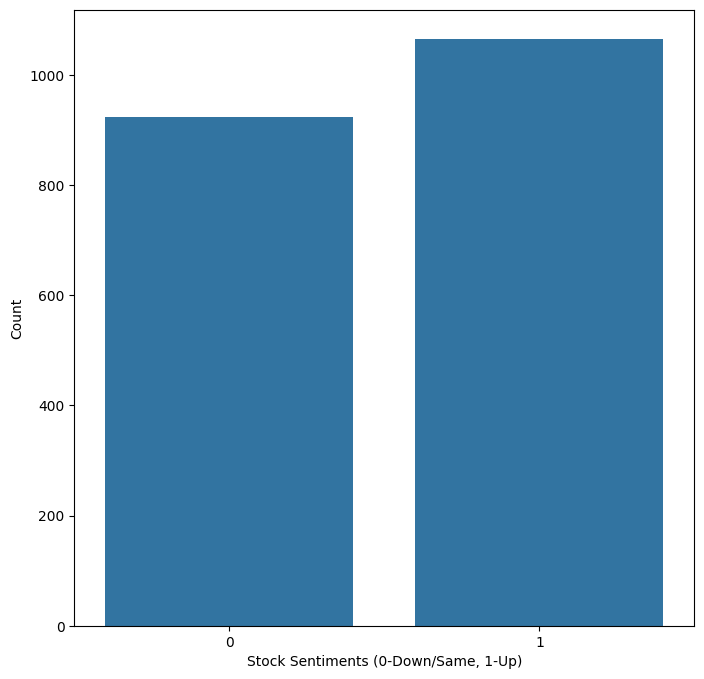

In [20]:
plt.figure(figsize=(8,8))
sns.countplot(x='Label', data=df)
plt.xlabel('Stock Sentiments (0-Down/Same, 1-Up)')
plt.ylabel('Count')
plt.show()

In [21]:
df_copy = df.copy()
df_copy.reset_index(inplace=True)

In [22]:
train = df_copy[df_copy['Date'] < '20150101']
test = df_copy[df_copy['Date'] > '20141231']
y_train = train['Label']
train = train.iloc[:, 3:28]
y_test = test['Label']
test = test.iloc[:, 3:28]

In [23]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
train.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)
test.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)


In [25]:
new_columns = [str(i) for i in range(0,25)]
train.columns = new_columns
test.columns = new_columns
for i in new_columns:
  train[i] = train[i].str.lower()
  test[i] = test[i].str.lower()


In [26]:
train_headlines = []
test_headlines = []
for row in range(0, train.shape[0]):
  train_headlines.append(' '.join(str(x) for x in train.iloc[row, 0:25]))
for row in range(0, test.shape[0]):
  test_headlines.append(' '.join(str(x) for x in test.iloc[row, 0:25]))

In [27]:
ps = PorterStemmer()
train_corpus = []
for i in range(0, len(train_headlines)):
  words = train_headlines[i].split()
  words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in words]
  headline = ' '.join(words)
  train_corpus.append(headline)

In [28]:
test_corpus = []
for i in range(0, len(test_headlines)):
  words = test_headlines[i].split()
  words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in words]
  headline = ' '.join(words)
  test_corpus.append(headline)

In [29]:
down_words = []
for i in list(y_train[y_train==0].index):
  down_words.append(train_corpus[i])
up_words = []
for i in list(y_train[y_train==1].index):
  up_words.append(train_corpus[i])

# WORDS IN NEWS WHICH NEGATIVELY IMPACT STOCK PRICE

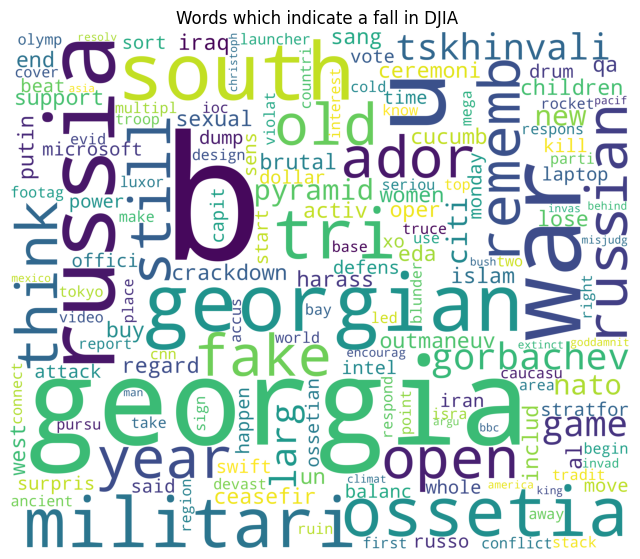

In [30]:
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(down_words[1])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate a fall in DJIA ")
plt.show()

# WORDS IN NEWS WHICH POSITIVELY IMPACT STOCK PRICE

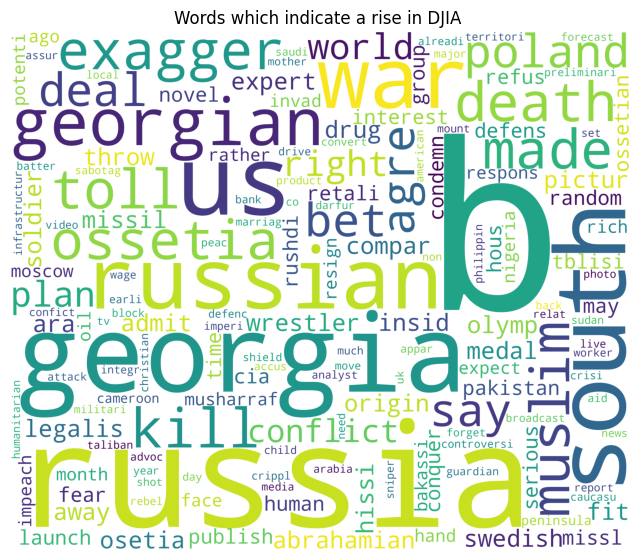

In [31]:
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(up_words[1])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate a rise in DJIA ")
plt.show()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(2,2))
X_train = cv.fit_transform(train_corpus).toarray()
X_test = cv.transform(test_corpus).toarray()

# **USING RANDOM FOREST**

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, rf_y_pred)
score2 = precision_score(y_test, rf_y_pred)
score3 = recall_score(y_test, rf_y_pred)
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

Accuracy score is: 51.32%
Precision score is: 0.51
Recall score is: 0.81


# **STOCK PRICE PREDICTION**

In [38]:
import re

def stock_prediction(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)
  temp = cv.transform([final_news]).toarray()
  return lr_classifier.predict(temp)

In [39]:
sample_test = df_copy[df_copy['Date'] > '20141231']
sample_test.reset_index(inplace=True)
sample_test = sample_test['Top1']

In [40]:
from random import randint

row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]
print('NEWS: {}\n'.format(sample_news))
if stock_prediction(sample_news):
  print('PREDICTION: The stock price will remain same or decrease.')
else:
  print('PREDICTION: The stock price will increase !')

NEWS: Study Confirms That Abstinence Education Has Utterly Failed At Preventing AIDS In Africa

PREDICTION: The stock price will remain same or decrease.


> # DJIA STOCK PERFORMANCE ANALYSIS FROM 2008 TO 2016

In [42]:
path="/content/upload_DJIA_table.csv"
df2=pd.read_csv(path)

In [43]:
df2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [44]:
df2.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312


In [45]:
df2.shape

(1989, 7)

In [46]:
df2.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [47]:
df2.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


In [48]:
df2['year']=df['Date'].dt.year

In [49]:
df2_grouped = df2.groupby('year').agg({'Volume': 'mean'}).reset_index()

In [50]:
Vol_per = df2[df2['year'] == 2016]

In [51]:
mean_volume_2016 = Vol_per['Volume'].mean()

In [52]:
mean_volume_2016   #ON AVERAGE PURCHASE VOLUME OF DJIA STOCK IN 2016

294873809.52380955

> # STOCK PERFORMANCE ON VOLUME PURCHASE (2008-2016)

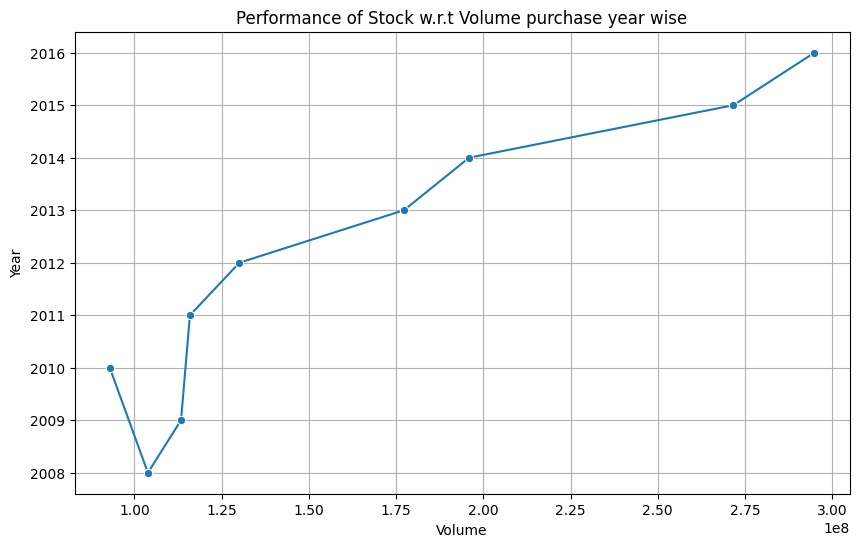

In [53]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Volume', y='year', data=df2_grouped, marker='o')

# Adding titles and labels
plt.title('Performance of Stock w.r.t Volume purchase year wise')
plt.xlabel('Volume')
plt.ylabel('Year')

# Display the graph
plt.grid(True)
plt.show()

<Axes: ylabel='Volume'>

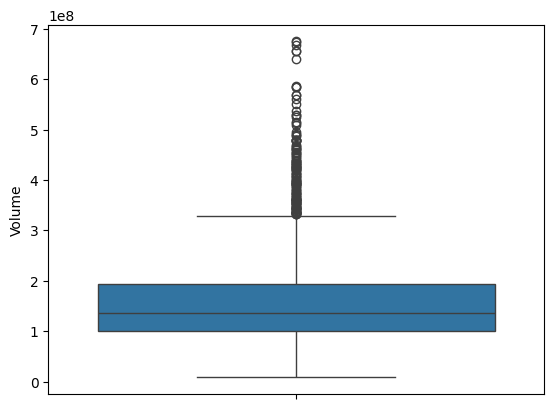

In [54]:
#OBSERVE THE BELL CURVE GRAPH TO CHECK THE GAUSSIAN DISTRIBUTION (NORMAL DISTRIBUTION)
sns.boxplot(df2['Volume'])

#before removing outliers

> Observe the the boxlpot before removing outliers

# Dealing with outliers with winsoriztion techniques

In [55]:
from scipy.stats.mstats import winsorize

# Winsorize 'value' column at 95th percentile
df2['winsorized_value'] = winsorize(df2['Volume'], limits=[0.05, 0.05])

print("\nDataFrame after Winsorization:")
print(df2.describe())



DataFrame after Winsorization:
               Open          High           Low         Close        Volume  \
count   1989.000000   1989.000000   1989.000000   1989.000000  1.989000e+03   
mean   13459.116048  13541.303173  13372.931728  13463.032255  1.628110e+08   
std     3143.281634   3136.271725   3150.420934   3144.006996  9.392343e+07   
min     6547.009766   6709.609863   6469.950195   6547.049805  8.410000e+06   
25%    10907.339844  11000.980469  10824.759766  10913.379883  1.000000e+08   
50%    13022.049805  13088.110352  12953.129883  13025.580078  1.351700e+08   
75%    16477.699219  16550.070312  16392.769531  16478.410156  1.926000e+08   
max    18315.060547  18351.359375  18272.560547  18312.390625  6.749200e+08   

          Adj Close         year  winsorized_value  
count   1989.000000  1989.000000      1.989000e+03  
mean   13463.032255  2012.050277      1.587148e+08  
std     3144.006996     2.318130      7.838572e+07  
min     6547.049805  2008.000000      7.3200

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


<Axes: ylabel='winsorized_value'>

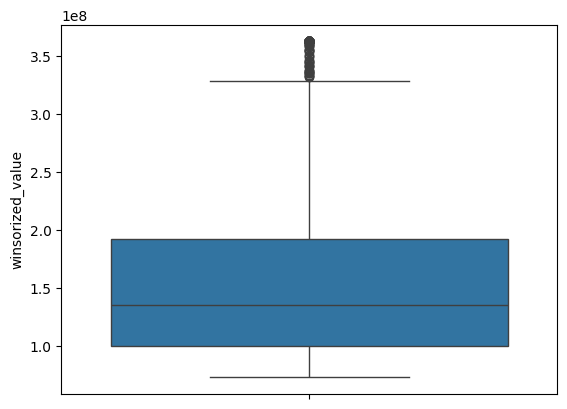

In [56]:
sns.boxplot(df2['winsorized_value'])

# > # DATA PREPROCESSING

Observe the normal distribution in bell curve graph

<Axes: xlabel='winsorized_value', ylabel='Count'>

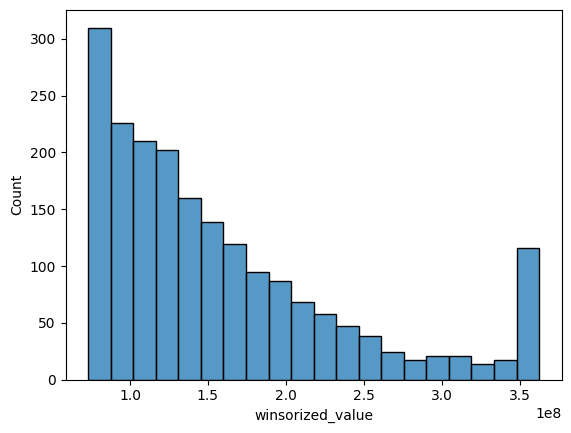

In [57]:
sns.histplot(df2['winsorized_value'])

As i observed here the graph is left skewed

# DATA TRANSFROMATION

Original Skewness: 1.2155593431972518
Transformed Skewness: 0.07125429040886723
Optimal Lambda: -0.50173877935957


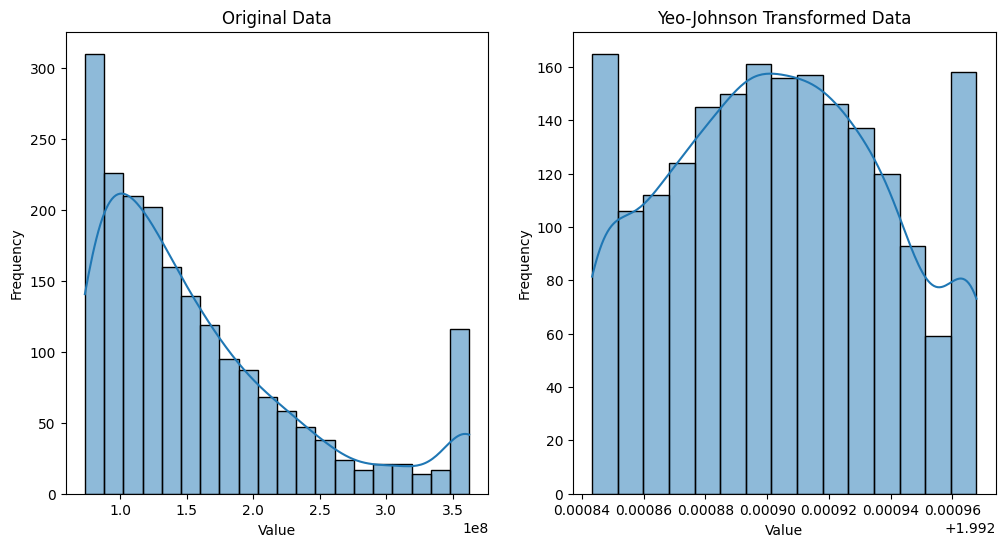

In [58]:
# Yeo johnson Transfromation

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import yeojohnson, skew


# Original skewness
original_skewness = skew(df2['winsorized_value'])
print(f'Original Skewness: {original_skewness}')

# Apply Yeo-Johnson transformation
transformed_data, lambda_opt = yeojohnson(df2['winsorized_value'])

# Transformed skewness
transformed_skewness = skew(transformed_data)
print(f'Transformed Skewness: {transformed_skewness}')
print(f'Optimal Lambda: {lambda_opt}')

# Plot original and Yeo-Johnson transformed data
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original data
sns.histplot(df2['winsorized_value'], kde=True, ax=ax[0])
ax[0].set_title('Original Data')
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Frequency')

# Yeo-Johnson transformed data
sns.histplot(transformed_data, kde=True, ax=ax[1])
ax[1].set_title('Yeo-Johnson Transformed Data')
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Frequency')

plt.show()


> # Feature Scaling

In [59]:
winsor_data=transformed_data

In [60]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler



# Create a DataFrame
df2 = pd.DataFrame(winsor_data)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df2)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df2.columns)

print("Original Data:\n", df2)
print("\nScaled Data (Standard Scaling):\n", scaled_df)


Original Data:
              0
0     1.992856
1     1.992902
2     1.992882
3     1.992887
4     1.992905
...        ...
1984  1.992916
1985  1.992926
1986  1.992923
1987  1.992927
1988  1.992937

[1989 rows x 1 columns]

Scaled Data (Standard Scaling):
              0
0    -1.340859
1    -0.051317
2    -0.610925
3    -0.472070
4     0.047055
...        ...
1984  0.362896
1985  0.640824
1986  0.537961
1987  0.647881
1988  0.938926

[1989 rows x 1 columns]


<Axes: ylabel='Count'>

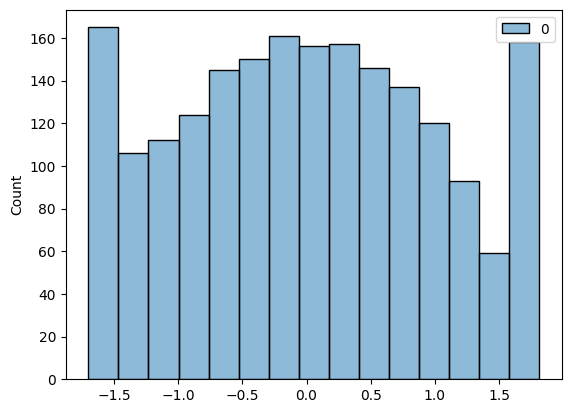

In [61]:
sns.histplot(scaled_data)

# MODEL TRAINING

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [63]:
df2['scale_data']=scaled_df

##

In [64]:
df2

,0,scale_data
0,1.992856,-1.340859
1,1.992902,-0.051317
2,1.992882,-0.610925
3,1.992887,-0.472070
4,1.992905,0.047055
...,...,...
1984,1.992916,0.362896
1985,1.992926,0.640824
1986,1.992923,0.537961
1987,1.992927,0.647881


In [65]:
X = df2.drop('scale_data',axis=1) # here we have all columns except scaled volume data
y = df2['scale_data']  # here scale data is filterized stock volume

volume=X

In [66]:
threshold = 0.5
y_categorical = np.where(y > threshold, 1, 0)  # 1 if above threshold, 0 if below


# **TRAIN MODEL  ON LOGISTIC REGRESSION**

In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)


LogisticRegression()

In [68]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')


Accuracy: 0.66
Confusion Matrix:
[[262   0]
 [136   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       262
           1       0.00      0.00      0.00       136

    accuracy                           0.66       398
   macro avg       0.33      0.50      0.40       398
weighted avg       0.43      0.66      0.52       398



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


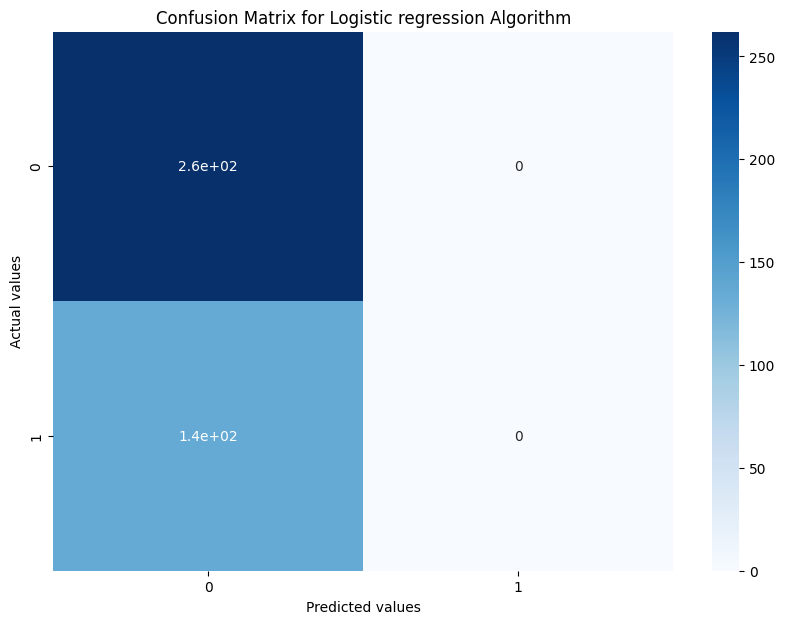

In [69]:
plt.figure(figsize=(10,7))
sns.heatmap(data=conf_matrix, annot=True, cmap="Blues")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic regression Algorithm')
plt.show()